In [289]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.dummy import DummyRegressor

In [290]:
def categorie_bmi(bmi):
    if bmi < 18.5:
        return 'faible'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'surpoids'
    else:
        return 'obesité'

In [291]:
df= pd.read_csv('brief_assurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [292]:
df['categorie_bmi'] = df['bmi'].apply(categorie_bmi)

In [293]:
df = df.drop(['bmi'],axis=1)

In [294]:
df

,age,sex,children,smoker,region,charges,categorie_bmi
0,19,female,0,yes,southwest,16884.92400,surpoids
1,18,male,1,no,southeast,1725.55230,obesité
2,28,male,3,no,southeast,4449.46200,obesité
3,33,male,0,no,northwest,21984.47061,normal
4,32,male,0,no,northwest,3866.85520,surpoids
...,...,...,...,...,...,...,...
1333,50,male,3,no,northwest,10600.54830,obesité
1334,18,female,0,no,northeast,2205.98080,obesité
1335,18,female,0,no,southeast,1629.83350,obesité
1336,21,female,0,no,southwest,2007.94500,surpoids


In [295]:
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test = train_test_split(X, y,shuffle=True, test_size=0.15,random_state=42, stratify=X[['smoker','region','sex']])

In [296]:
X_train,X_validation,y_train,y_validation = train_test_split(X_train, y_train,shuffle=True, test_size=0.2,random_state=42, stratify=None)

In [297]:
dummy_regr = DummyRegressor(strategy="mean")
X_train.head()
dummy_regr.fit(X_train, y_train)
dummy_regr.score(X_test, y_test)

-0.013743454770904995

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1338 non-null   int64  
 1   sex            1338 non-null   object 
 2   children       1338 non-null   int64  
 3   smoker         1338 non-null   object 
 4   region         1338 non-null   object 
 5   charges        1338 non-null   float64
 6   categorie_bmi  1338 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


In [299]:
X=df.drop('charges',axis=1)
y=df['charges']
X_train,X_test,y_train,y_test = train_test_split(X, y,shuffle=True, test_size=0.2,random_state=42, stratify=X[['smoker','region','sex']])

In [301]:
quantitative_col = list(X.select_dtypes(include=[float,int]).columns)
categoriel_col = list(X.select_dtypes(include=[object]).columns)
quantitative_pipeline = make_pipeline(StandardScaler(),PolynomialFeatures())
preprocessing=ColumnTransformer([("one_hot",OneHotEncoder(drop='if_binary'),categoriel_col),("scaling",quantitative_pipeline,quantitative_col)])

In [302]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

my_pipe_ridge = make_pipeline(preprocessing, Ridge())

my_pipe_lasso = make_pipeline(preprocessing, Lasso())

my_pipe_elasticnet= make_pipeline(preprocessing, ElasticNet())

In [305]:
cross_val_score(my_pipe_lr,X_train,y_train,cv=5).mean()

0.7412768032217836

In [306]:
print(cross_val_score(my_pipe_lr,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_ridge,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_lasso,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_elasticnet,X_train,y_train,cv=5).mean())

0.7412768032217836
0.7412462520856378
0.7412767285928459
0.3729210864596257


In [307]:
param_grid={'ridge__alpha':np.arange(1,50)/10
            }
search_ridge = GridSearchCV(my_pipe_ridge, param_grid,cv=5)

In [308]:
my_pipe_ridge.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('one_hot', OneHotEncoder(drop='if_binary'),
                                    ['sex', 'smoker', 'region', 'categorie_bmi']),
                                   ('scaling',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    ['age', 'children'])])),
  ('ridge', Ridge())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('one_hot', OneHotEncoder(drop='if_binary'),
                                  ['sex', 'smoker', 'region', 'categorie_bmi']),
                                 ('scaling',
                                  Pipeline(steps=[('standardscaler',
                                               

In [309]:
search_ridge.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'categorie_bmi']),
                                                                        ('scaling',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['age',
                                                                          'children'])])),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [310]:
search_ridge.best_score_

0.7412586186800423

In [311]:
search_ridge.best_params_

{'ridge__alpha': 0.4}

In [312]:
param_grid={'lasso__alpha':np.arange(1,50)/10
            }
search_lasso = GridSearchCV(my_pipe_lasso, param_grid,cv=5)
search_lasso.fit(X_train,y_train)

/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.972e+09, tolerance: 1.254e+07
  model = cd_fast.enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.930e+09, tolerance: 1.295e+07
  model = cd_fast.enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'categorie_bmi']),
                                                                        ('scaling',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['age',
                                                                          'children'])])),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [313]:
search_lasso.best_score_

0.7413473058084808

In [315]:
search_lasso.best_params_

{'lasso__alpha': 4.9}

In [316]:
search_elasticnet=GridSearchCV(my_pipe_elasticnet,param_grid,cv=5)

In [317]:
my_pipe_elasticnet.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('one_hot', OneHotEncoder(drop='if_binary'),
                                    ['sex', 'smoker', 'region', 'categorie_bmi']),
                                   ('scaling',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('polynomialfeatures',
                                                     PolynomialFeatures())]),
                                    ['age', 'children'])])),
  ('elasticnet', ElasticNet())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('one_hot', OneHotEncoder(drop='if_binary'),
                                  ['sex', 'smoker', 'region', 'categorie_bmi']),
                                 ('scaling',
                                  Pipeline(steps=[('standardscaler',
                                     

In [318]:
param={'elasticnet__alpha':np.arange(1,50)/10,
'elasticnet__l1_ratio':np.arange(1,50)/10
            }

search_elasticnet = GridSearchCV(my_pipe_elasticnet,param,cv=5)
search_elasticnet.fit(X_train,y_train)

/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.972e+09, tolerance: 1.254e+07
  model = cd_fast.enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.930e+09, tolerance: 1.295e+07
  model = cd_fast.enet_coordinate_descent(
/Users/leonzhang/miniconda3/envs/dataanalyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('one_hot',
                                                                         OneHotEncoder(drop='if_binary'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'categorie_bmi']),
                                                                        ('scaling',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('polynomialfeatures',
                                                                                          PolynomialFeatures())]),
                                                                         ['age',
                                                                          'children'])])),
                                       ('elasticnet', ElasticNet())]),
             param...
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9]),
                         'elasticnet__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])})

In [319]:
search_lasso.best_score_

0.7413473058084808

In [320]:
search_elasticnet.best_params_

{'elasticnet__alpha': 4.9, 'elasticnet__l1_ratio': 1.0}

In [321]:
my_pipe_lr = make_pipeline(preprocessing, LinearRegression())

my_pipe_ridge = make_pipeline(preprocessing, Ridge(alpha=0.4))

my_pipe_lasso = make_pipeline(preprocessing, Lasso(alpha=4.9))

my_pipe_elasticnet= make_pipeline(preprocessing, ElasticNet(alpha=4.9 ,l1_ratio = 1.0))

In [322]:
print(cross_val_score(my_pipe_lr,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_ridge,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_lasso,X_train,y_train,cv=5).mean())
print(cross_val_score(my_pipe_elasticnet,X_train,y_train,cv=5).mean())

0.7412768032217836
0.7412586186800423
0.7413473058084808
0.7413473058084808


In [ ]:

my_pipe_lr.fit(X_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one_hot',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex', 'smoker', 'region',
                                                   'categorie_bmi']),
                                                 ('scaling',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('polynomialfeatures',
                                                                   PolynomialFeatures())]),
                                                  ['age', 'children'])])),
                ('linearregression', LinearRegression())])

In [ ]:
my_pipe_lr.score(X_test,y_test)

0.7652474567807582

In [ ]:
y_pred = my_pipe_lr.predict(X_train)
residual =(y_pred-y_train).abs().sort_values(ascending=False)
residual

1300    28912.87309
543     26666.42801
577     25467.07448
219     24537.76784
819     23855.40209
           ...     
1032       25.52270
606        25.37975
101        18.91060
791        11.59300
487        10.06400
Name: charges, Length: 1137, dtype: float64

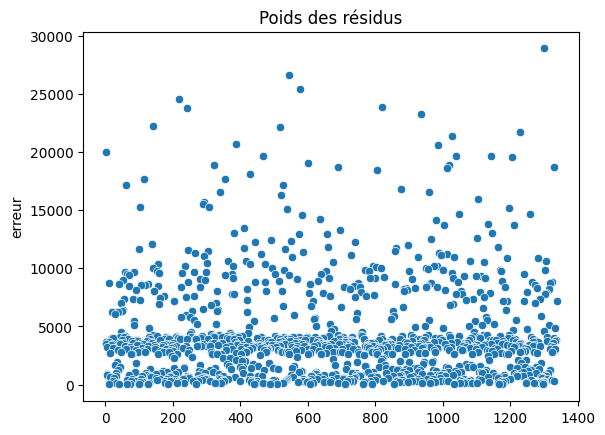

In [ ]:
sns.scatterplot(residual)
plt.title('Poids des résidus')
plt.ylabel('erreur')
plt.show()

In [ ]:
residual.info()

<class 'pandas.core.series.Series'>
Int64Index: 1137 entries, 1300 to 487
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1137 non-null   float64
dtypes: float64(1)
memory usage: 17.8 KB


In [ ]:
to_drop=residual[residual>20000].index

In [ ]:
to_drop


Int64Index([1300, 543, 577, 219, 819, 242, 936, 140, 516, 1230, 1027, 387, 987,
            3],
           dtype='int64')

In [ ]:
to_drop.size

14

In [ ]:
X_train_drop_residu = X_train.drop(to_drop)
y_train_drop_residu = y_train.drop(to_drop)


In [ ]:

my_pipe_lr.fit(X_train_drop_residu, y_train_drop_residu)
my_pipe_lr.score(X_test, y_test)

0.7621606556880139

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1137 entries, 1035 to 1182
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            1137 non-null   int64 
 1   sex            1137 non-null   object
 2   children       1137 non-null   int64 
 3   smoker         1137 non-null   object
 4   region         1137 non-null   object
 5   categorie_bmi  1137 non-null   object
dtypes: int64(2), object(4)
memory usage: 94.5+ KB


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:37:08   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    

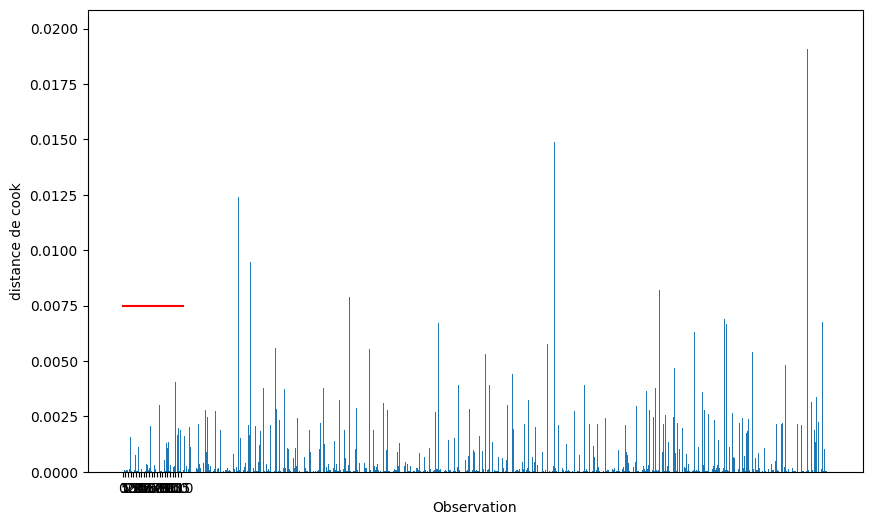

In [ ]:
%run modelisation_model_perfomantes.ipynb

In [ ]:
residual_index

Int64Index([  34,  140,  219,  242,  321,  430,  516,  526,  543,  577,  819,
            1012, 1019, 1027, 1206, 1230, 1300],
           dtype='int64')

In [ ]:
X_train_drop_residu.index

Int64Index([1035, 1070, 1012,  459,  943,  116, 1013,  701,  350,  375,
            ...
             675, 1222,  462,  181,  575,  823,   76,  858,  876, 1182],
           dtype='int64', length=1123)

In [ ]:
for index in residual_index:
    if index in X_train_drop_residu.index:
        X_train_drop_residu.drop(index,inplace=True,axis=0)

for index in residual_index:
    if index in y_train_drop_residu.index:
        y_train_drop_residu.drop(index,inplace=True,axis=0)



In [ ]:
residual_index

Int64Index([  34,  140,  219,  242,  321,  430,  516,  526,  543,  577,  819,
            1012, 1019, 1027, 1206, 1230, 1300],
           dtype='int64')

In [ ]:
X_train_drop_residu.index

Int64Index([1035, 1070,  459,  943,  116, 1013,  701,  350,  375,  382,
            ...
             675, 1222,  462,  181,  575,  823,   76,  858,  876, 1182],
           dtype='int64', length=1117)

In [ ]:
y_train_drop_residu.index

Int64Index([1035, 1070,  459,  943,  116, 1013,  701,  350,  375,  382,
            ...
             675, 1222,  462,  181,  575,  823,   76,  858,  876, 1182],
           dtype='int64', length=1117)

In [ ]:
y_train_drop_residu

1035    12094.47800
1070    39871.70430
459      7682.67000
943      1628.47090
116     11381.32540
           ...     
823      8219.20390
76       3947.41310
858     18218.16139
876     26140.36030
1182     2632.99200
Name: charges, Length: 1117, dtype: float64

In [ ]:
my_pipe_lasso.fit(X_train_drop_residu, y_train_drop_residu)
my_pipe_lasso.score(X_test, y_test)

0.7701839007314116

In [ ]:
X_train

,age,sex,children,smoker,region,categorie_bmi
1035,54,female,3,no,southwest,normal
1070,37,male,1,yes,southeast,obesité
1012,61,female,4,no,southeast,obesité
459,40,female,3,no,southeast,obesité
943,19,male,0,no,northwest,normal
...,...,...,...,...,...,...
823,44,female,2,no,southeast,surpoids
76,29,female,1,no,southeast,surpoids
858,25,female,1,no,southeast,obesité
876,49,female,1,no,southwest,surpoids


In [ ]:
a

NameError: name 'a' is not defined

meilleur score sans determine parametre alpha 0.765063644178095

In [ ]:
import pickle 
pickle_out = open("my_pipe_ridge.pkl", "wb") 
pickle.dump(my_pipe_lr, pickle_out) 
pickle_out.close()